# COGS 108 - Final Project 

# Overview

In this Data Science project,we are going to first do an EDA of potential factors that might affect an Airbnb’s listing price. The factors are characteristics of the house itself and neighbourhood( including transit score of the place). Then, we will classify our data based on log price and build a model to predict whether an Airbnb’s listing price is higher or lower than average price (in log scale). Our final conclusions are: listing price is related to the neighborhood and positively correlated with accommodates, number of bathrooms, number of bedrooms and rating scores; therefore, we build a Logistic Regression model and achieve a F1 score of 0.74.

# Names

- Chang Gao
- Zerong Li
- Qing Liu
- Shuli Zhu

# Research Question

Can we make a prediction on whether the listing price of an Airbnb in San Francisco is below or above average based on characteristics of the listing itself(number of bedrooms, bathrooms, accommodates, review scores, etc) and neighborhood (including transit availability)?

# Background and Prior Work



References (include links):
- 1) [EDA & price prediction in SF & NY](https://arxiv.org/abs/1805.12101)

- 2) [Muni system map in San Francisco](https://www.sfmta.com/getting-around/muni/routes-stops)

- 3) [How proximity to public transit affects home values](https://www.constructiondive.com/news/how-proximity-to-public-transit-affects-home-values/446533/)

- 4) [Key Factors Affecting the Price of Airbnb Listings: A Geographically Weighted Approach](https://www.mdpi.com/2071-1050/9/9/1635)
<BR>
    
- Why is this question of interest to your group? <BR>
Airbnb is a platform where house owners offer their house for lodgings and homestays. Nowadays, it is becoming a more popular choice of staying in other cities for short periods of time. The listing price of Airbnb is an important factor for both owners and visitors. For owners, one thing they need to consider is how much profit they can get from running an airbnb. The amount of profit will determine whether or not they decide to operate their apartment as an airbnb. This amount heavily depends on the listing price they set and how many visitors their apartment attracts. The latter can be influenced not only by certain characteristics of the house, but also the neighborhood it is in. On the other hand, for visitors, they will likely choose from a pool of airbnbs that match their requirements such as the number of bedrooms & bathrooms, its location (e.g. is it close to transportation services), and find the best fitting one with a price close to their budget after evaluation. They will also take into account the ratings and reviews given by other visitors while making the decision. As can be seen, the listing price and certain characteristics of the house as well as the neighborhoods are crucial factors in determining listing price. Therefore, we decided to study whether there is a relationship between listing price and any of the characteristics, and generate a model that can predict whether a specific Airbnb’s listing price is above or below the average price based on given characteristics. <BR> <BR>
- What background information led you to your hypothesis?<BR>
By comparing the heat map of airbnb prices in San Francisco [1] and the transit map [2], we found that the area with higher prices overlap with the area with denser transit routes. Moreover, studies have shown that proximity to transit affects home values [3]. As listing price is likely to be closely related to the actual home value, we hypothesize that **transit availability nearby** would have a positive effect on the listing price. Additionally, based on the studies of Airbnb in a different city ( Metro Nashville, Tennessee), number of reviews and review rating scores are significantly connected to Airbnb listing price [4]. As a result, we propose that **higher number of reviews** and **higher ratings** may also correlate with a higher listing price in San Francisco. Although this finding is not about Airbnb in San Francisco specifically, we feel that certain patterns about price and house features may be shared among airbnbs in all cities, therefore the stated pattern in the paper may be applicable to our study. <BR><BR>
- Why is this important?<BR>
These questions are important because they lead us to better understand how the facilities and market competition of the neighborhoods work collectively to affect the listing price of Airbnb. Moreover, the results also serve as a reference for both house owners and potential customers. The answers will help homeowners to better decide whether they would like to set their house as Airbnb and what price they should set. House owners could use our model to evaluate the price they charge in comparison to the market price level after input variables' values. For visitors who have demand on Airbnbs, this project helps to make  better selection of where they should stay addressing both internal and external factors: the characteristics of the house, neighborhood and the listing price. The model evaluates whether an Airbnb is overcharge or undercharge.<BR><BR>
- What has already been done on this topic? What is already known? <BR>
Prior work has proposed a model that can generate an optimal listing price for a new listing based on similar listings that already exist [1]. The predictors for this model include **number of reviews**, **number of accommodates**, and **number of bedrooms**. The prediction we want to carry out (whether a listing would have a price higher or lower than the average log price of existing listings)  closely resembles this model, therefore we hypothesize that these features will be correlated with listing price, and will look at these features in our EDA process.<BR><BR>
- Why San Francisco?<BR>
We are choosing San Francisco because there is a high  demand for Airbnbs. The San Francisco Bay Area is a popular city for tourists. Many famous attractions like the golden gate bridge, the Pier 39, Lombard Street, the cable car and so on are located in San Francisco. These well-known attractions bring San Francisco a great volume of tourists every year that leads to a high demand for short-term rentals. In addition, people in San Francisco pay the highest rent in the nation. Usually, Airbnb is a more economical option for tourists especially for large parties. Aslo, it is more diverse in room  type compared to hotels. Therefore, we think that it is fun to explore this city from a tourist’s view and use Airbnb data to learn what are some influential features of Airbnb in San Francisco.

 


# Hypothesis


Based on the background information we found, we hypothesize that accommodates (number of guests it can accommodate), number of bedrooms, number of reviews, review scores rating, and nearby transit availability may be closely related to the listing price of Airbnb. Therefore, these features may be useful for predicting if the price of a certain airbnb has a price higher or lower than the average listing price.

# Dataset(s)

- Dataset Name: Inside Airbnb (San Francisco Area) on April 07, 2020
- Link to the dataset: http://data.insideairbnb.com/united-states/ca/san-francisco/2020-04-07/data/listings.csv.gz
- Number of observations: 8138
- Number of variables: 106 (id, description, neighborhood, room_type, price, accommodates, bathrooms, beds, etc.)
- Description: The dataset contains each Airbnb Home in detail (characteristics of the rental place itself). The dataset includes information such as the name, the description of the home, the room type and number of bedrooms and the price of listings and more! In this project, we are going to only look at observations that are Entire Home/Apartment.
 
 
- Outside source: <em>walkscore.com</em>
- Description: If we make a query using longitude and latitude, walkscore.com will return the walkscore, transit score and the bike score of that location. We can get the score by web scraping or using HTTP GET Request.
- How is the score calculated? [Go to Walk Score Methodology](https://www.walkscore.com/methodology.shtml)
 
 
- How to combine: Since we have the longitude and latitude information of each Airbnb listing, we can make a query with the longitude and latitude on each observation and append the scores to each observation.

# Setup

In [1]:
import json
import math
import string
import requests
from collections import defaultdict
from tqdm import tqdm_notebook as jdt
import warnings


import pandas as pd
import numpy as np
import geopandas as gpd
from bs4 import BeautifulSoup

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(15,10)})
from mpl_toolkits.axes_grid1 import make_axes_locatable
import shapely.geometry as shp
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import contextily as ctx

from scipy.stats import ks_2samp

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix

warnings.filterwarnings('ignore')
%config InlineBackend.figure_format ='retina'

# Data Cleaning

 - [1.0 Select columns/rows for Airbnb listing dataset](#1.0-Select-columns/rows-for-Airbnb-listing-dataset)
 - [1.1 Examine missing values](#1.1-Examine-missing-values)
 - [1.2 Gather Walk/Transit/Bike Score from walkscore.com based on Latitude and Longitude](#1.2-Gather-Walk/Transit/Bike-Score-based-on-Latitude-and-Longitude)
 - [1.3 Sanitize Price](#1.3-Sanitize-Price)
 - [1.4 Append Scores to the Dataset](#1.4-Append-Scores-to-the-Dataset)
 - [1.5 Save & Load the Pre-processing Dataest](#1.5-Save-&-Load-the-Pre-processing-Dataest)

### 1.0 Select columns/rows for Airbnb listing dataset

- The list below shows all variables from the dataset. We first remove the host names that are related to hosts' private information but are irrelavant to our analysis, and then choose several variables of our interests.
- Entire home/apt are the most common type of listigs. And the price of Airbnb listings largely depends on the type of rooms. Therefore, we are only going to analyze on the listings that are entire home/apt.

In [57]:
# read dataset
df = pd.read_csv("listings.csv")

In [58]:
# select columns
listing = df[['id', 'host_id', 'host_is_superhost', 'host_listings_count', 
                   'neighbourhood', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 
                   'bathrooms', 'bedrooms', 'price', 'review_scores_rating', 'reviews_per_month']]

# select rows
listing = listing[listing['room_type'] == 'Entire home/apt']
listing.shape
listing = listing.reset_index(drop=True)

### 1.1 Examine missing values

From our observations below, 5 variables have missing data. The way we handle missingness is as follows: <BR>
    
- For "neighbourhood" column, we will remove the only listing that does not specify which neighbourhood it locates in. We look at the zipcode of this Airbnb listing and find that this listing is located in an island away from the center of San Francisco. Since the neighbourhood it belongs to is not specified in the dataset, and there is only one listing in that neighborhood, which is away from the center, we decide to remove it. <BR>

- For "bathrooms" and "bedrooms" columns, we will remove 4 listings that does not specify the number of bathrooms or bedrooms. <BR>
   
- For "review_per_month" and "review_scores_rating"columns, we replace the missing data with 0. Another way is to remove those listings. However, there are over a thousand listings whose rating or number of reviews per month are missing. Removing all rows will significantly reduce the sample size and lose a lot of information. <BR>
    
    

In [4]:
# number of missing values
display(listing.isna().sum())

id                         0
host_id                    0
host_is_superhost          0
host_listings_count        0
neighbourhood              1
latitude                   0
longitude                  0
property_type              0
room_type                  0
accommodates               0
bathrooms                  1
bedrooms                   3
price                      0
review_scores_rating    1239
reviews_per_month       1207
dtype: int64

In [5]:
# zipcode of neighbourhood of NaN
neighb = df[['neighbourhood','zipcode']]
neighb[neighb['neighbourhood'].isna()]

,neighbourhood,zipcode
7465,NaN,94130


In [6]:
# drop NaN's
listing = listing.dropna(subset=['neighbourhood','bathrooms','bedrooms'])

#replacing NaN's in 'reviews_per_month' with 0
listing.fillna({'reviews_per_month':0}, inplace=True)
listing.fillna({'review_scores_rating':0}, inplace=True)

### 1.2 Gather Walk/Transit/Bike Score based on Latitude and Longitude

In [7]:
scores = defaultdict()

In [8]:
for index, row in listing.iterrows():
    scores[row['id']] = defaultdict()

In [9]:
# GET SCORE USING HTTP REQUEST and ADD THEM TO THE LIST 
def get_score_url():
    url = "https://www.walkscore.com/score/loc/"
    for index, row in jdt(listing.iterrows()):
        idx = row['id']
        latitude = row['latitude']
        longitude = row['longitude']
        lat_str = "lat=" + str(latitude)
        long_str = "lng=" + str(longitude)
        this_url = url + lat_str + '/' + long_str
        print(this_url)  
        
        payload = {}
        headers= {}
        response = requests.request("GET", this_url, headers=headers, data = payload)
        
        soup = BeautifulSoup(response.text)
        tag = soup.findAll(class_='clearfix score-div')
        
        for i in tag:
            t = i.findAll('img')
            src = t[0]['src']
            if 'walk/score/' in str(src):
                slash = src.rfind('/')
                dot = src.rfind('.')
                to_score = int(src[slash+1:dot])
                scores[idx]['walk'] = {'walk_score':to_score, 'walk_description': walkscore_to_des(to_score)}
            elif 'transit/score' in str(src):
                slash = src.rfind('/')
                dot = src.rfind('.')
                to_score = int(src[slash+1:dot])
                scores[idx]['transit'] = {'transit_score':to_score, 'transit_description': transitscore_to_des(to_score)}
            elif 'bike/score' in str(src):
                slash = src.rfind('/')
                dot = src.rfind('.')
                to_score = int(src[slash+1:dot])
                scores[idx]['bike'] = {'bike_score':to_score, 'bike_description': bikescore_to_des(to_score)}
            else:
                continue
                
# save the scores for later used
with open('scores_extra.json', 'w') as fp:
    json.dump(dict(scores), fp)

### 1.3 Sanitize Price

#### Convert price from string to number
Since price is a quantitative variable, we need to strip '$' and ',' and convert price from string to number.

In [10]:
# a helper function used to strip '$' and ',' and convert it to number
def sanitize_price(string):
    string = string.replace('$','')
    string = string.replace(',','')
    string = string.strip()
    return float(string)

In [11]:
listing['price'] = listing['price'].apply(sanitize_price)

### 1.4 Append Scores to the Dataset

In [12]:
with open('scores_extra.json', 'r') as fp:
    scores = json.load(fp)

In [13]:
def append_walk_score(place_id):
    return scores[str(place_id)]['walk']['walk_score']
def append_transit_score(place_id):
    return scores[str(place_id)]['transit']['transit_score']
def append_bike_score(place_id):
    return scores[str(place_id)]['bike']['bike_score']

In [14]:
listing['walk_score'] = listing['id'].apply(append_walk_score)
listing['transit_score'] = listing['id'].apply(append_transit_score)
listing['bike_score'] = listing['id'].apply(append_bike_score)

### 1.5 Save & Load the Pre-processing Dataest

In [15]:
# save the cleaned dataset for later use
listing.to_csv('listing_reduced.csv', index=False)

In [16]:
# display the first several rows of the dataframe
listing = pd.read_csv("listing_reduced.csv")
listing.head()

,id,host_id,host_is_superhost,host_listings_count,neighbourhood,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,price,review_scores_rating,reviews_per_month,walk_score,transit_score,bike_score
0,958,1169,t,1,Lower Haight,37.76931,-122.43386,Apartment,Entire home/apt,3,1.0,1.0,170.0,97.0,1.84,97,68,81
1,5858,8904,f,2,Bernal Heights,37.74511,-122.42102,Apartment,Entire home/apt,5,1.0,2.0,235.0,98.0,0.83,98,65,77
2,8339,24215,f,2,Western Addition/NOPA,37.77525,-122.43637,Condominium,Entire home/apt,4,1.5,2.0,703.0,97.0,0.22,98,63,89
3,10251,35199,t,1,Mission District,37.75831,-122.41386,House,Entire home/apt,4,1.0,2.0,150.0,96.0,2.62,98,69,99
4,10578,37049,f,0,Nob Hill,37.79143,-122.41544,Apartment,Entire home/apt,2,1.0,0.0,120.0,99.0,0.18,99,81,63


# Data Analysis & Results

 - [2.0 Create Geopandas DataFrame for Geospatial Analysis](#2.0-Create-Geopandas-DataFrame-for-Geospatial-Analysis)
 - [2.1 Airbnb Listings: Rental Price](#2.1-Airbnb-Listings:-Rental-Price)
     - [2.1.1 applying log scale to price](#2.1.1-applying-log-scale-to-price)
 - [2.2 Airbnb Listings: Accommodates](#2.2-Airbnb-Listings:-Accommodates)
 - [2.3 Airbnb Listings: Bathrooms](#2.3-Airbnb-Listings:-Bathrooms)
 - [2.4 Airbnb Listings: Bedrooms](#2.4-Airbnb-Listings:-Bedrooms)
 - [2.5 Airbnb Listings: Reviews per Month and Review Scores Rating](#2.5-Airbnb-Listings:-Reviews-per-Month-and-Review-Scores-Rating)
 - [2.6 Airbnb Listings: Super Host](#2.6-Airbnb-Listings:-Super-Host)
 - [2.7 Airbnb Listings: Host Listings Count](#2.7-Airbnb-Listings:-Host-Listings-Count)
 - [2.8 Airbnb Listings: Transit Scores](#2.8-Airbnb-Listings:-Transit-Scores)
 - [2.9 Airbnb Listings: Neighbourhood](#2.9-Airbnb-Listings:-Neighbourhood)
 - [2.10 Building a Classifier](#2.10-Building-a-Classifier)
     - [2.10.0 Set a Threshold](#2.10.0-Set-a-Threshold)
     - [2.10.1 Evaluation Metric](#2.10.1-Evaluation-Metric)
     - [2.10.2 Baseline Model](#2.10.2-Baseline-Model)
         - [2.10.2.1 Onehot Encoding](#2.10.2.1-Onehot-Encoding)
         - [2.10.2.2 Generate train/test set](#2.10.2.2-Generating-train/test-set)
         - [2.10.2.3 Fitting the baseline model using Logistic Regression](#2.10.2.3-Fitting-the-baseline-model-using-Logistic-Regression)
     - [2.10.3 Advance model](#2.10.3-Advance-model)
         - [2.10.3.1 Logistic Regression](#2.10.3.1-Logistic-Regression)
         - [2.10.3.2 Decision Tree Classifier](#2.10.3.2-Decision-Tree-Classifier)
         - [2.10.3.3 Random Forest Classifier](#2.10.3.3-Random-Forest-Classifier)

### 2.0 Create Geopandas DataFrame for Geospatial Analysis

In [17]:
# Create geometry Points and conver the pandas dataframe to geopandas dataframe

listing['geometry'] = listing[['longitude', 'latitude']].apply(shp.Point, axis=1)

listing_gpd = gpd.GeoDataFrame(listing)
listing_gpd.crs = {'init':'epsg:4326'} # coordinate reference system
listing_gpd = listing_gpd.to_crs(epsg=3857)

sf = gpd.read_file('san-francisco.geojson')
sf = sf[['name', 'geometry']]
sf = sf.rename(columns={"name": "neighbourhood"}).set_geometry('geometry')
sf = sf.to_crs(epsg=3857)

### 2.1 Airbnb Listings: Rental Price

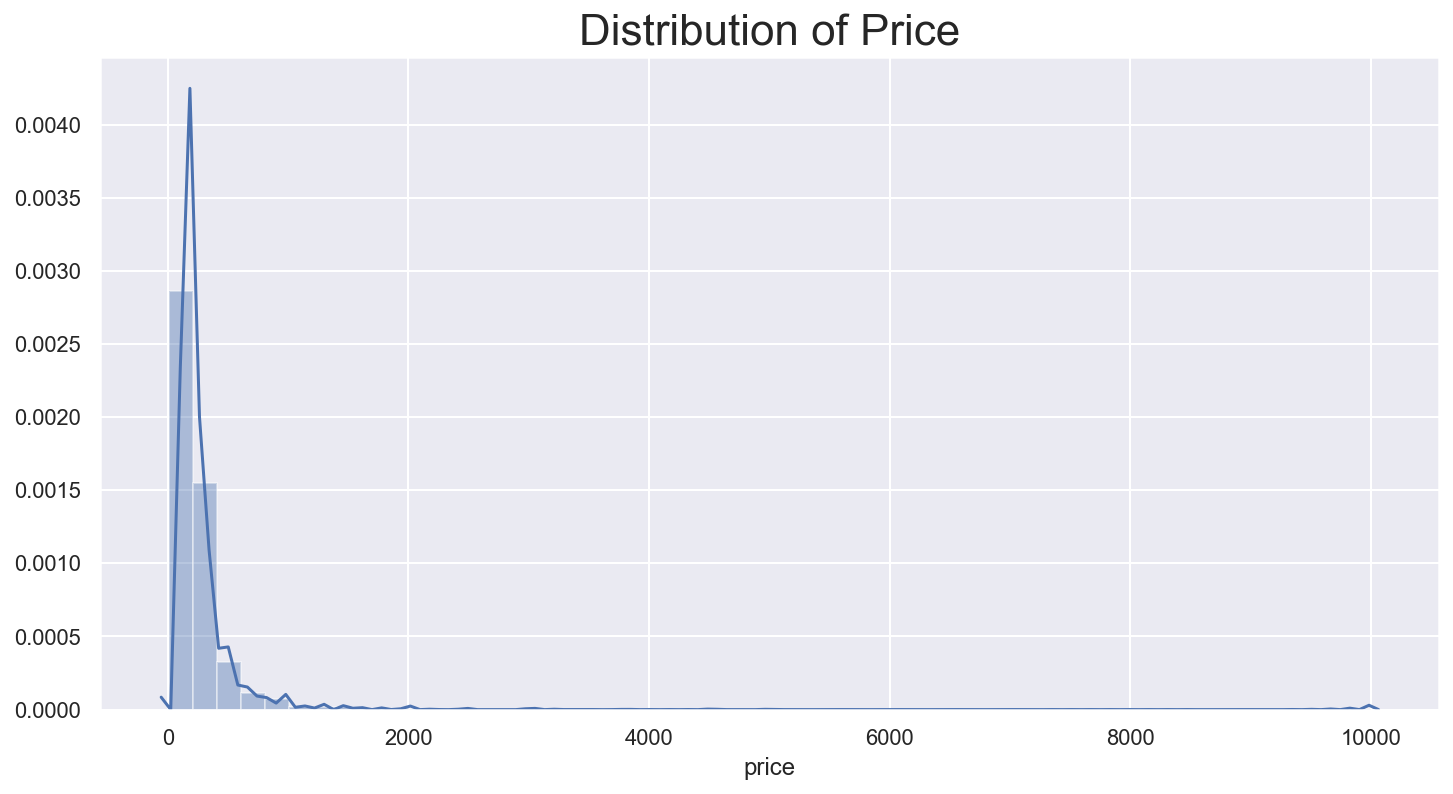

In [18]:
# distribution of price
fig = plt.subplots(1,figsize=(12, 6))
sns.distplot(listing_gpd['price']).set_title("Distribution of Price", fontsize=22);
plt.show()

- The above plot shows that most of the listings have price lower than \\$500; only a few are between \\$500 to \\$2,000, which results in a distribution skewed to right. This is expected, because most people who stay in Airbnb are only for travelling or business, and they are less likely to choose a listing with high price for short stay. In order to attract more customers, the host will not set the price too high. 

- Therefore, we are going to apply a log transformation to make the distribution more normal.

#### 2.1.1 applying log scale to price

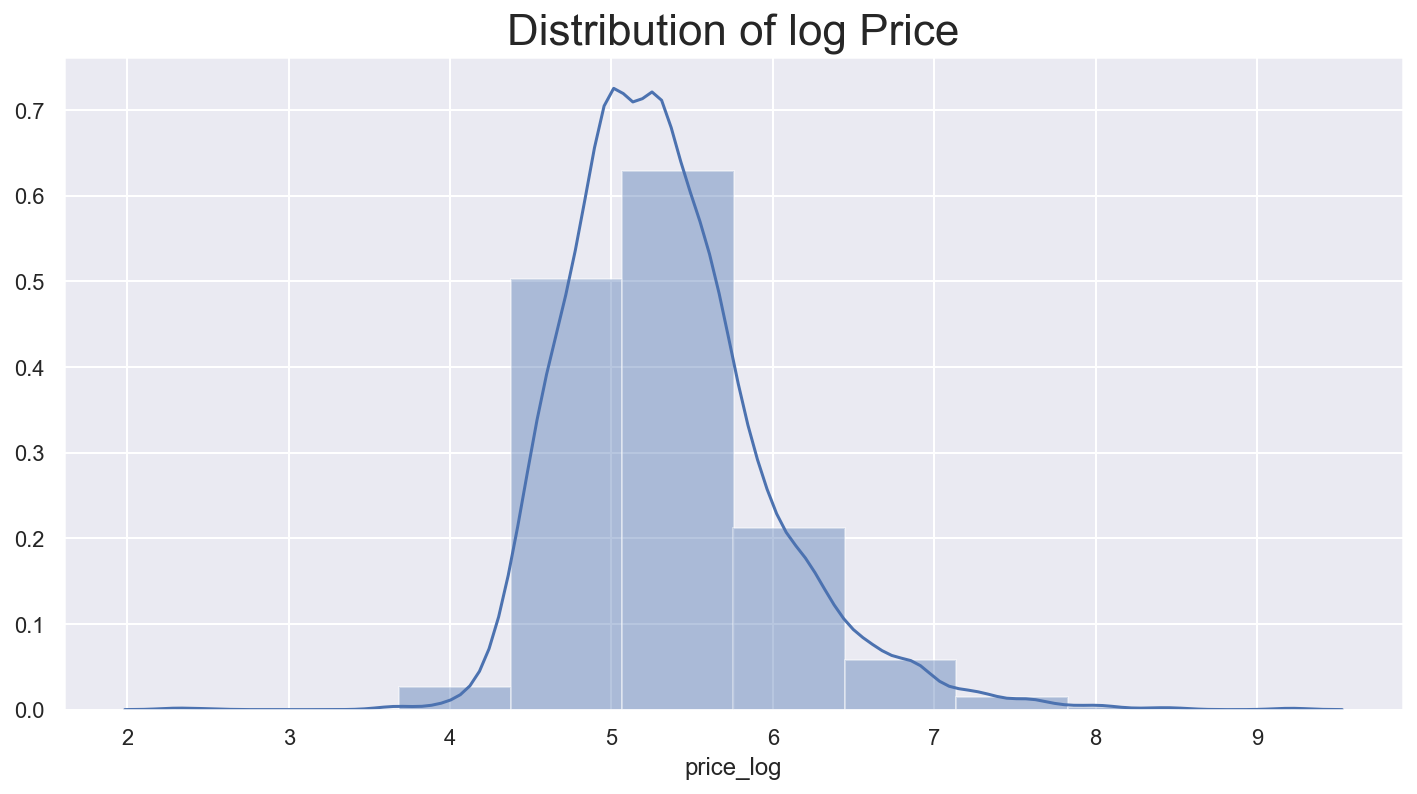

In [19]:
fig = plt.subplots(1,figsize=(12, 6))
listing_gpd['price_log'] = np.log(listing_gpd['price'])
sns.distplot(listing_gpd['price_log'], bins=10).set_title("Distribution of log Price", fontsize=22);
plt.show()

* The plot also shows that the log price are from about 3.5 to 8, with most listings having a log price from 4.5 to 6.5.
* After applying log transformation to price, the data looks more normally distributed. For the rest of our project, our analysis is all based on log price.


### 2.2 Airbnb Listings: Accommodates

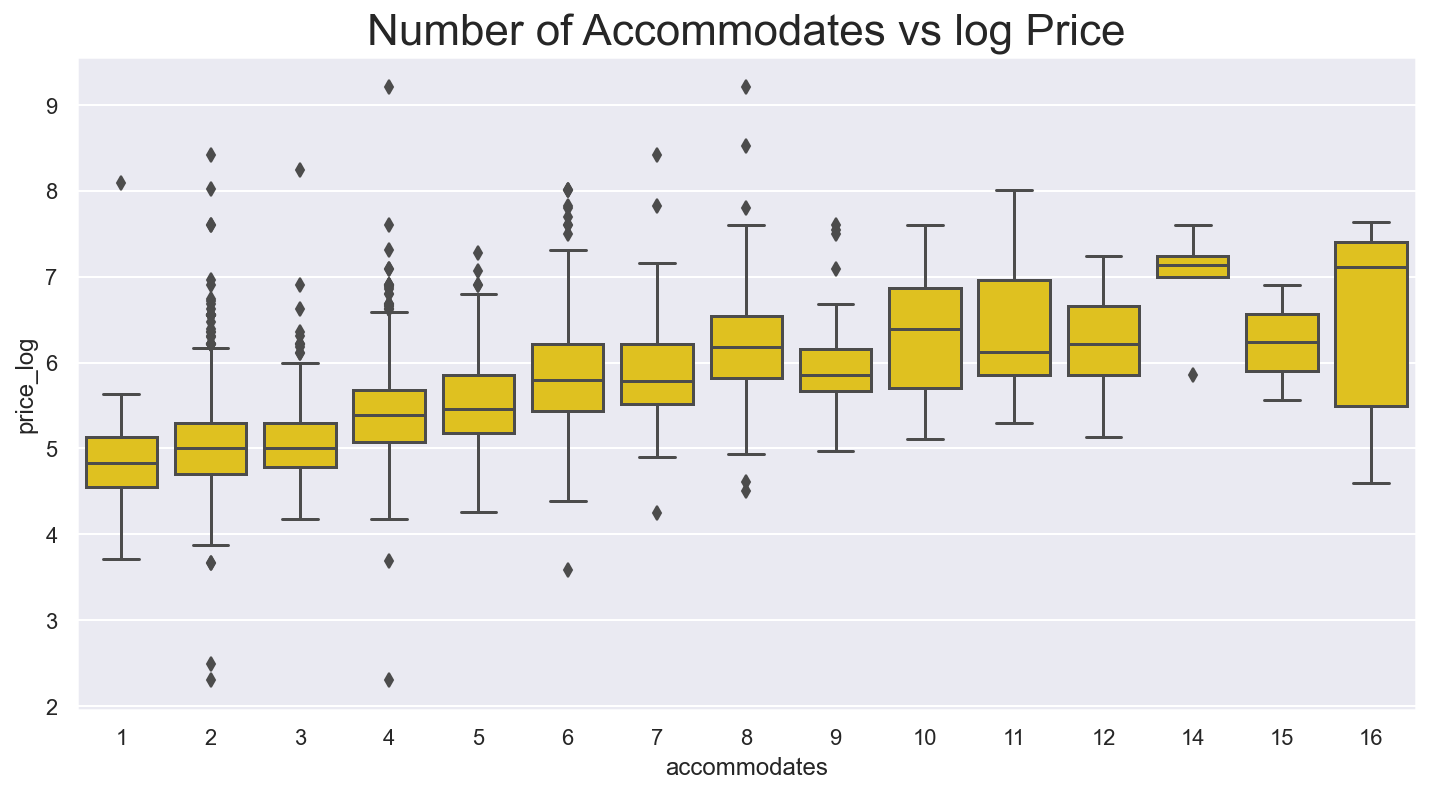

In [20]:
# plot multiple boxplots 
price_acc = listing_gpd[['accommodates', 'price_log']]
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
sns.boxplot(x=price_acc['accommodates'],y=price_acc['price_log'], data=price_acc, color='gold')
ax.set_title("Number of Accommodates vs log Price", fontsize=22)
# visualize the distributions of log price for different # accommodates
plt.show()

- Since the number of guests a listing can accommodate is a discrete variable that ranges from 1 to 16, we view it as 16 categories and use boxplot to visualize the trend. For each category, the log price is spread out. Therefore, we plot several boxplots to visualize how the log price is distributed for different numbers of guests a listing can accommodate.
- Generally, despite some outliers with extremely high or low prices, there is a positive relationship between number of accommodates and log prices. So, we think that a listing which accommodates more people is likely to have a higher price.


### 2.3 Airbnb Listings: Bathrooms

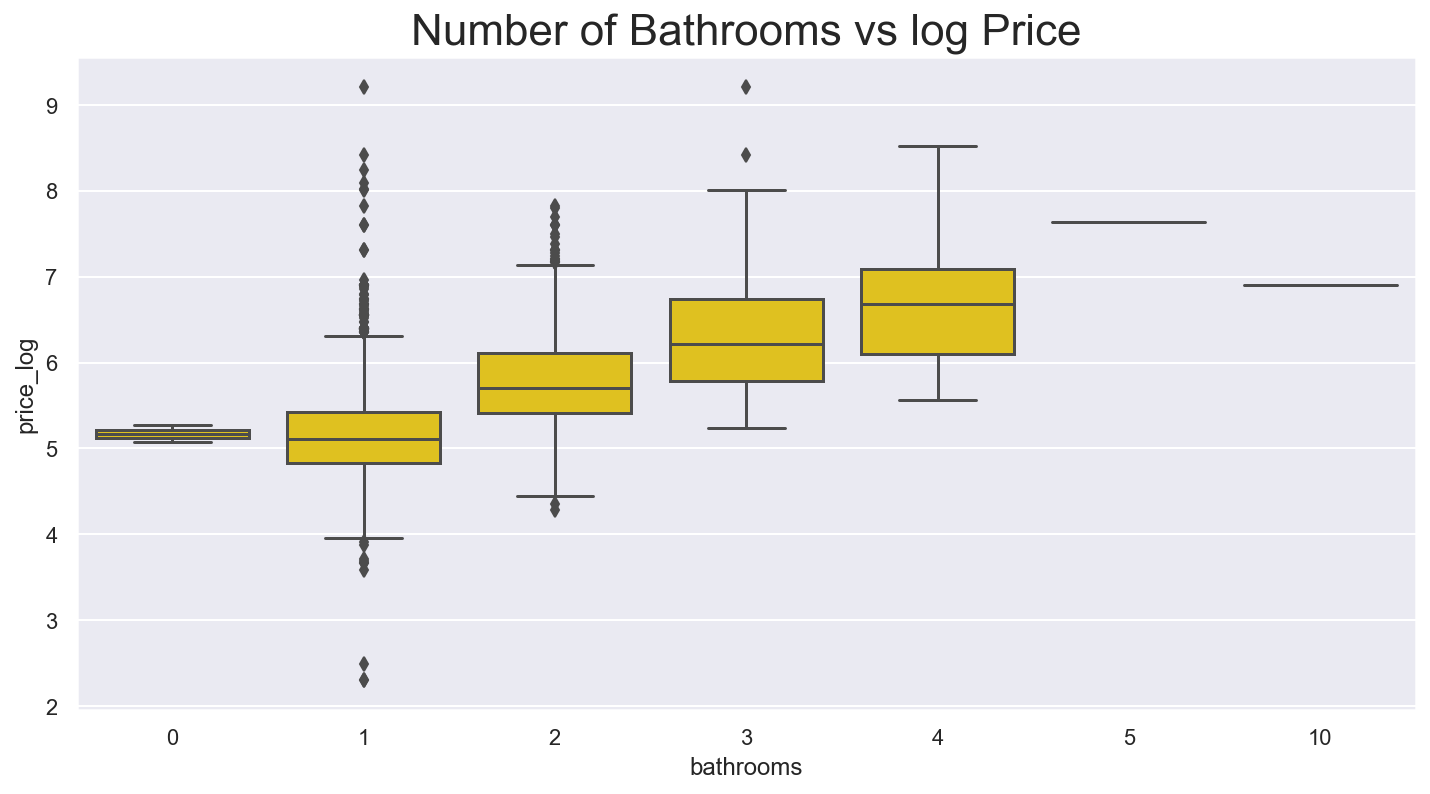

In [21]:
# plot multiple boxplots 
price_bath = listing_gpd[['bathrooms','price_log']]
price_bath['bathrooms'] = price_bath['bathrooms'].apply(lambda x: int(x))
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
sns.boxplot(x=price_bath['bathrooms'], y='price_log', data=price_bath, color='gold')
ax.set_title("Number of Bathrooms vs log Price", fontsize=22)
# visualize the distributions of log price for different # bathrooms
plt.show()

-  We choose boxplot because the number of bathrooms is a discrete variable that ranges from 1 to 10 in our dataset. Viewing each number as a category, we plot 7 boxplots for each category (number of bathroom= 0 or 1 or 2 or 3 or 4 or 5 or 10).  
- As can be seen from the graph, most rooms have 1-4 bathrooms. Despite some outliers in each category (especially those with 1, 2, or 3 bathrooms), there is a positive relationship between the number of bathrooms and log price. This relationship is reasonable, since a bigger house would generally have more bathrooms, and would have a higher listing price.


### 2.4 Airbnb Listings: Bedrooms

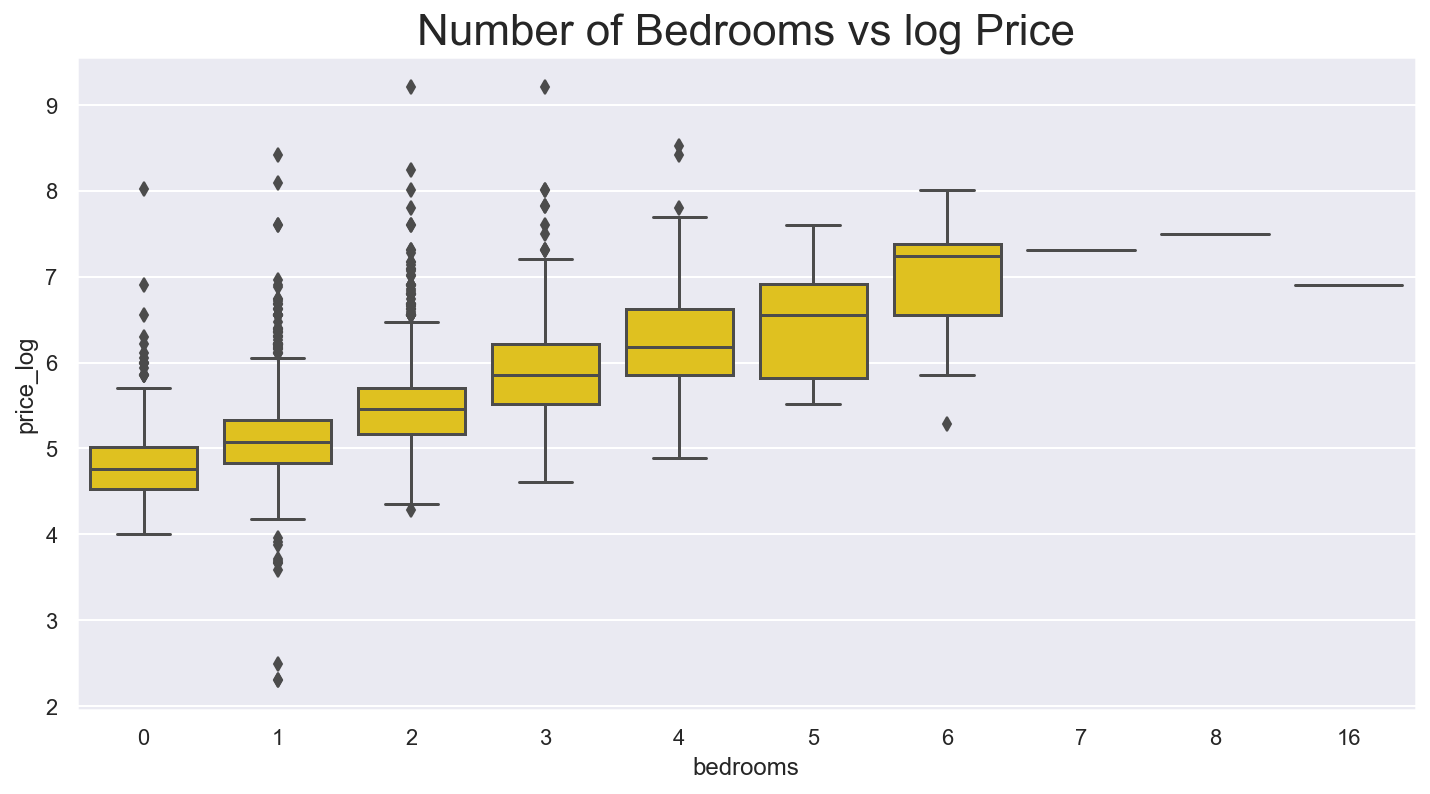

In [22]:
price_bed = listing_gpd[['bedrooms','price_log']]
price_bed['bedrooms'] = price_bed['bedrooms'].apply(lambda x: int(x))
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
sns.boxplot(x=price_bed['bedrooms'], y='price_log', data=price_bed, color='gold')
ax.set_title("Number of Bedrooms vs log Price", fontsize=22)
plt.show()

-  We choose boxplot because the number of bedrooms is a discrete variable that ranges from 1 to 16 in our dataset. Viewing each number as a category, we plot 10 boxplots for each category. 
- As can be seen from the graph, most rooms have 0-6 bedrooms. Despite some outliers in each category (especially those with 1, 2, or 3 bedrooms), there is a positive relationship between the number of bedrooms and log price. This relationship is reasonable, since a bigger house would generally have more bedrooms, and would have a higher listing price.


### 2.5 Airbnb Listings: Reviews per Month and Review Scores Rating

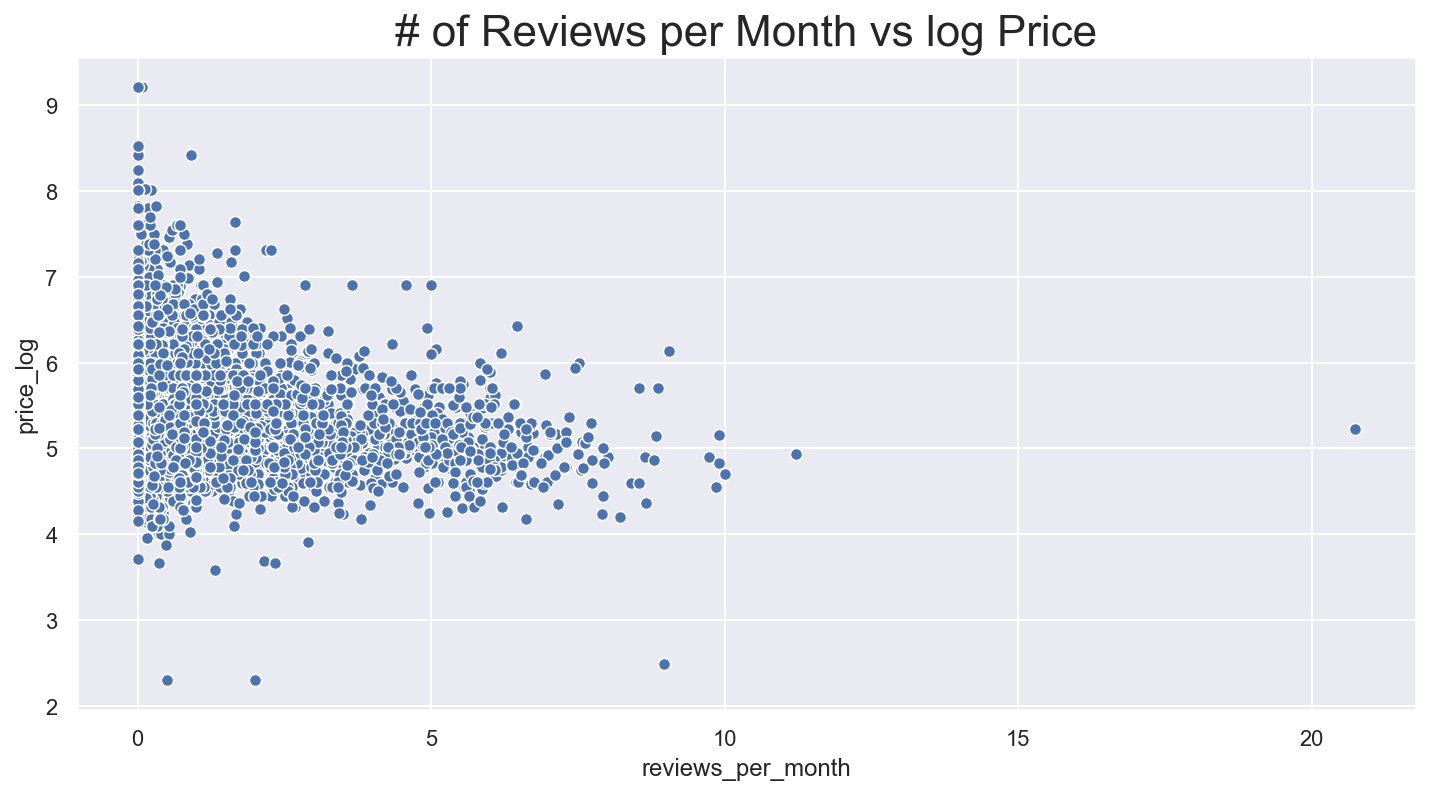

In [23]:
price_review = listing_gpd[['reviews_per_month','price_log']]
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
sns.scatterplot(x='reviews_per_month', y='price_log', data=price_review, color='b')
ax.set_title("# of Reviews per Month vs log Price", fontsize=22)
plt.show()

- Since we are interested in the distribution of log_price for Airbnb over the number of reviews per month, therefore we applied scatter plot to visualize the distribution. 
- As can be seen from the plot, most houses have 0-5 reviews per month. As the number of reviews increase, there are less houses present in our data set. It is hard to see from this scatter plot if there is a relationship between number of reviews and log price, since there are a lot of houses that have the same number of reviews but significantly different prices. Therefore, to further investigate the correlation, we decided to draw another violin plot (as shown below).


In [24]:
thresh = price_review['price_log'].mean()

In [25]:
price_review=price_review.assign(above_avg = price_review['price_log'].apply(lambda x: 0 if x<thresh else 1))
price_review

,reviews_per_month,price_log,above_avg
0,1.84,5.135798,0
1,0.83,5.459586,1
2,0.22,6.555357,1
3,2.62,5.010635,0
4,0.18,4.787492,0
...,...,...,...
4872,0.00,4.787492,0
4873,0.00,4.718499,0
4874,0.00,5.594711,1
4875,0.00,5.926926,1


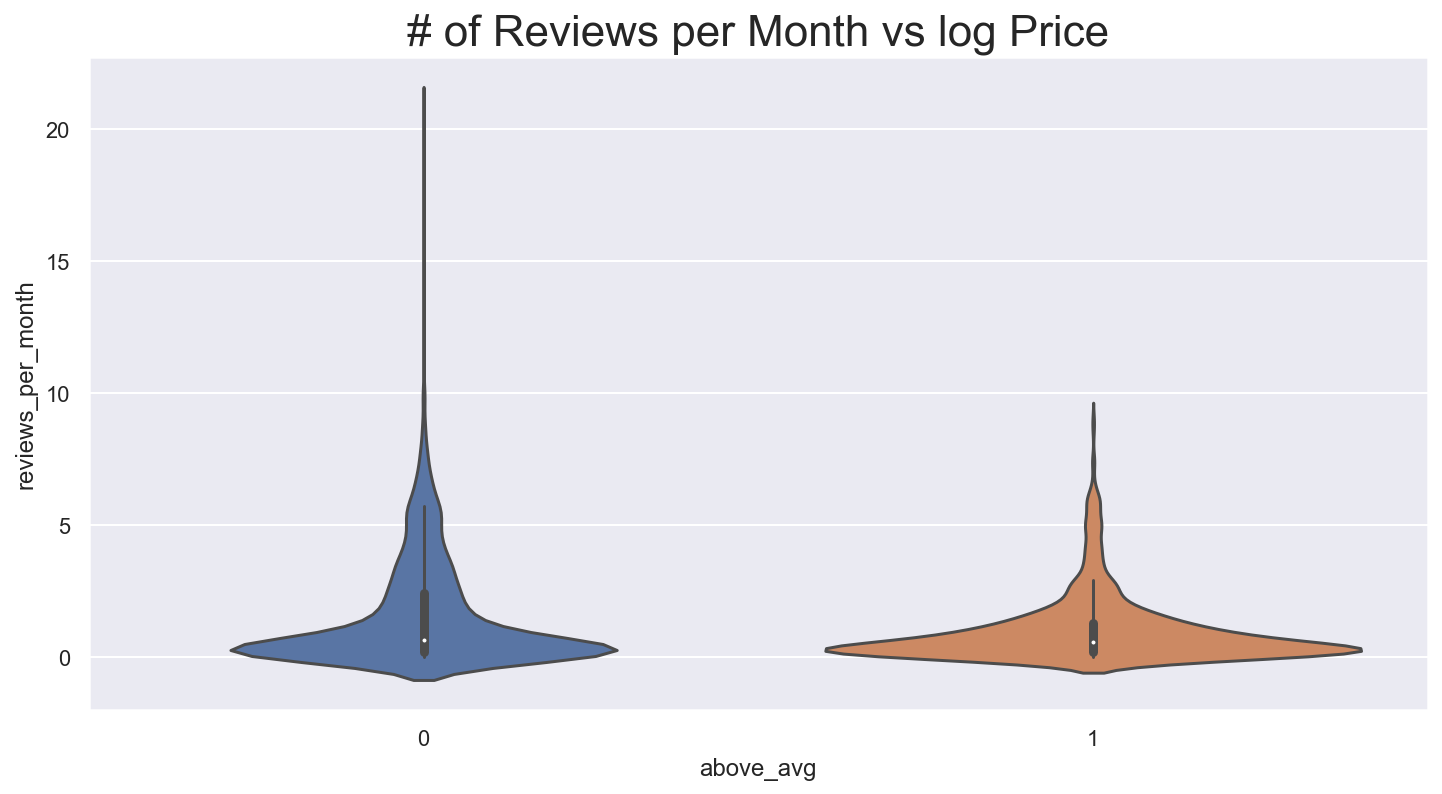

In [26]:
df = price_review[price_review['reviews_per_month']>0]
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
sns.violinplot(x='above_avg', y='reviews_per_month', data=df)
ax.set_title("# of Reviews per Month vs log Price", fontsize=22)
plt.show()

- We split the data based on the average log price into two categories: above the average log price and below the average log price. Apart from basic distribution within (such as range and quartiles), we also want to investigate the variation in number of reviews per month within the price categories. Hence, we adopt two violin plots.
- As can be seen from the violin plot, the overall distributions of the number of reviews per month are similar for the two price categories. A lot of the data for both categories are around 0, this is due to the fact that we have lots of missing data which we filled with 0. This issue is discussed more in the limitation part at the end. Although we can see that for prices below average, there are more houses with higher number of reviews (10-20 reviews per month), this observation is likely due to the presence of outliers. Therefore, we conclude that there is no obvious correlation between number of reviews per month and listing price.  


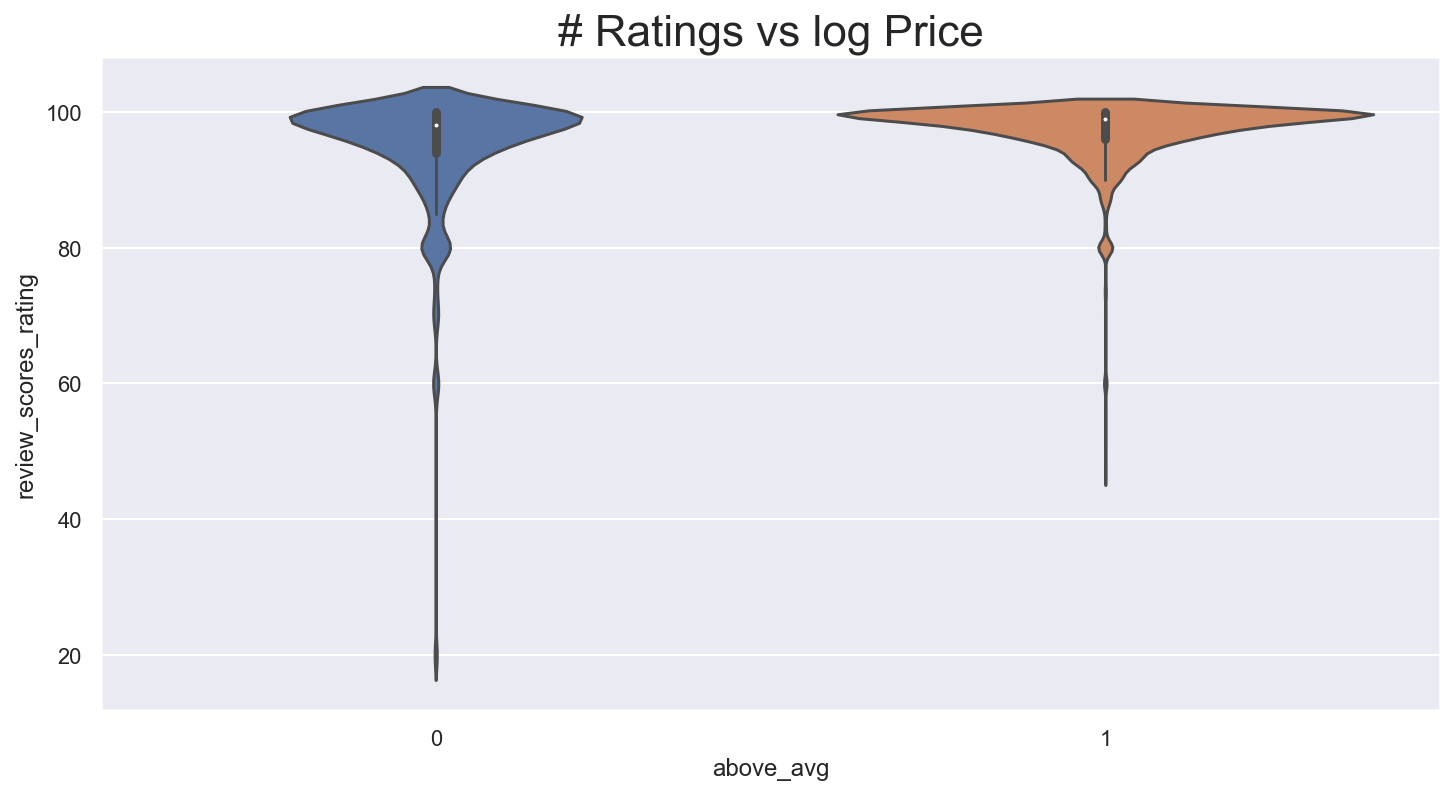

In [27]:
price_rating = listing_gpd[['review_scores_rating','price_log']]
price_rating=price_rating.assign(above_avg = price_rating['price_log'].apply(lambda x: 0 if x<thresh else 1))
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
sns.violinplot(x='above_avg', y='review_scores_rating', data=price_rating[price_rating['review_scores_rating']>0])
ax.set_title("# Ratings vs log Price", fontsize=22)
plt.show()

-  We split the data based on the average log price into two categories: above the average log price and below the average log price. Apart from basic distribution within (such as range and quartiles), we also want to investigate the variation in the categories. Hence, we adopt two violin plots.
-  As can be seen from the violin plots, although the average ratings of the two categories of log prices are similar, we can still find that more data are centered at 100 or close to 100 for listings with higher price. Therefore, we conclude that there is a slight positive relationship between ratings and listing price. 
 


### 2.6 Airbnb Listings: Super Host

#### 2.6.1 Explore relationship between super host and log price by distributions

In [28]:
super_host = listing_gpd[['host_id','host_is_superhost','price_log']]
super_host = super_host.drop_duplicates()
super_host = super_host.assign(host_is_superhost = super_host['host_is_superhost'].replace({'t':'is_superhost','f':'not_superhost'}))

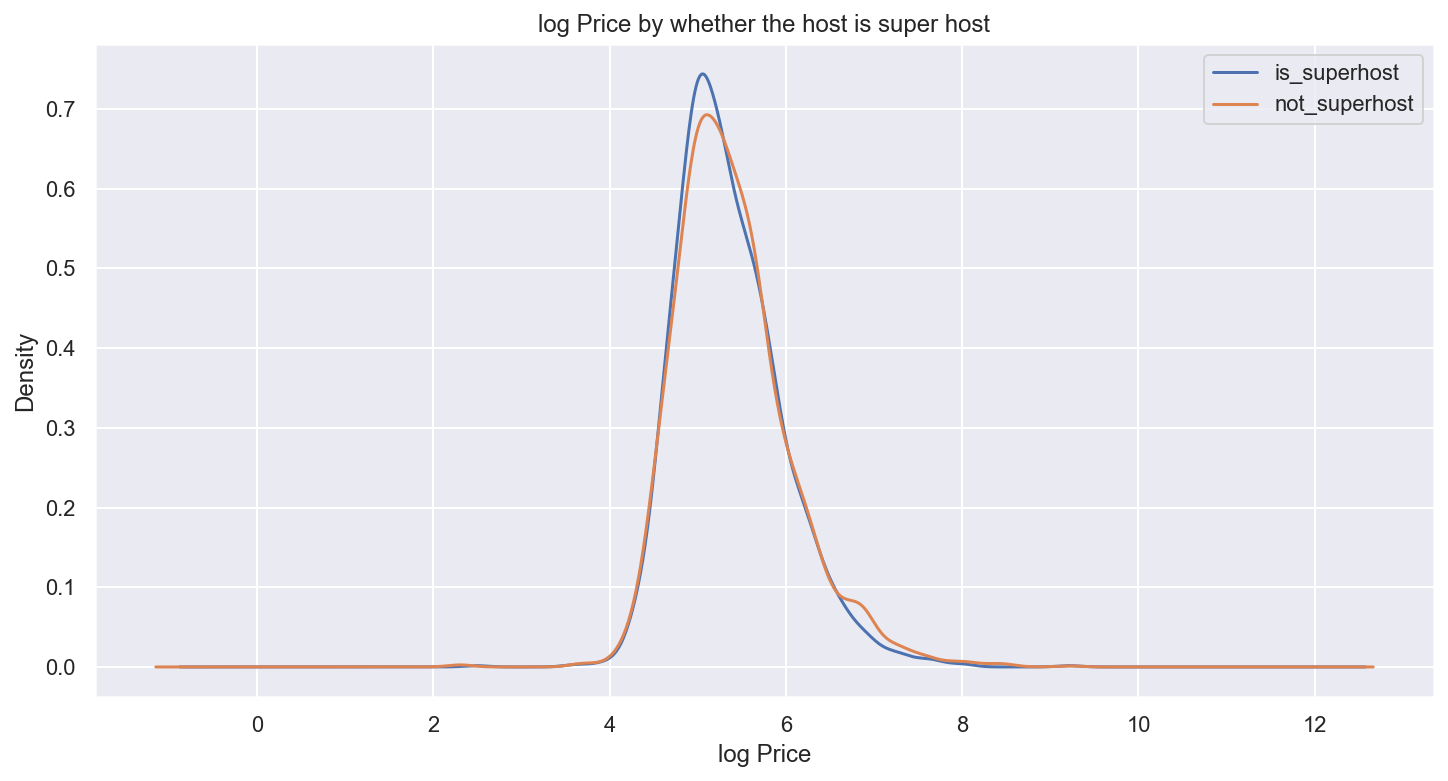

In [29]:
title='log Price by whether the host is super host'
plt.figure(figsize=(12,6))
(
    super_host
    .groupby('host_is_superhost')['price_log']
    .plot(kind='kde', legend=True, subplots=False, title=title)
);   
plt.xlabel('log Price')
plt.show()

From the above kernel density estimation for listings of super host and non-super host, we notice that two distributions looks similar. So, we hypothesize that two samples are from same distributions, meaning that whether or not the listing is owned by a super host does not associate with price. We will run a permutation test to justify our hypothesis.

#### 2.6.2 Hypothesis Testing:

- **Null hypothesis**: In the population, log price of super host and non-super host have the same distribution.

- **Alternative hypothesis**: In the population, the two distributions are different.

- Significance level: 0.05

- Test Statistic: ks statistic. We choose ks statistic as a reasonable statistic to test for difference in distributions.

In [30]:
# calculate the observed ks ststistic from the sample
grps = super_host.groupby('host_is_superhost')['price_log']
obs = ks_2samp(grps.get_group('is_superhost'), grps.get_group('not_superhost')).statistic
obs

0.0299206130599878

In [31]:
repetitions = 500
ks_lst = []
for i in range(repetitions):
    # shuffle the price_log column
    shuffled_col = (
        super_host['host_is_superhost']
        .sample(replace=False, frac=1)
        .reset_index(drop=True)
    )
    # put them in a table
    shuffled = (
        super_host
        .assign(shuffled=shuffled_col)
    )
    # compute the KS statstics
    grps = shuffled.groupby('shuffled')['price_log']
    ks = ks_2samp(grps.get_group('is_superhost'), grps.get_group('not_superhost')).statistic
    ks_lst.append(ks)

    pval = np.mean(np.array(ks_lst) > obs)
print('The p-value is', pval)


The p-value is 0.34


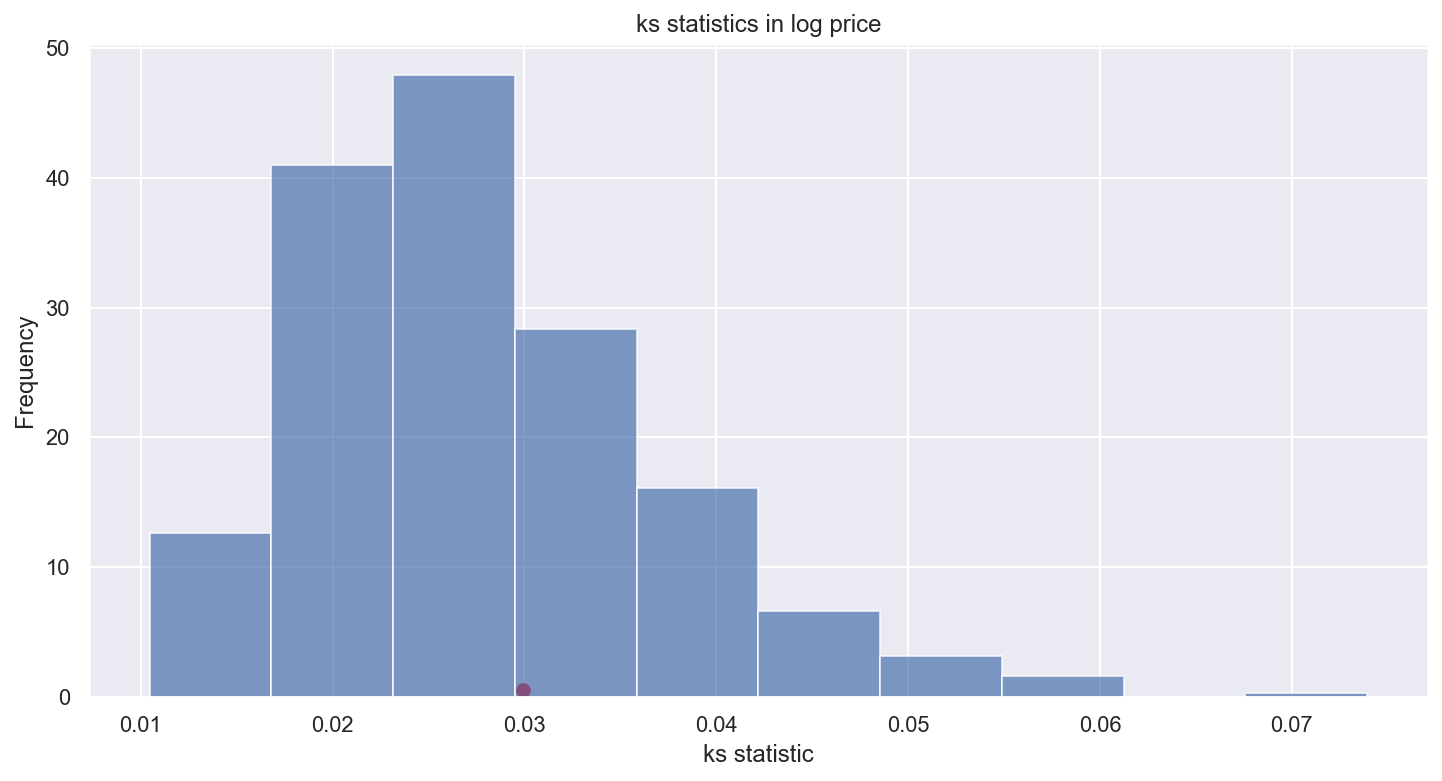

In [55]:
title = 'ks statistics in log price'
plt.figure(figsize=(12,6))
pd.Series(ks_lst).plot(kind='hist', density=True, alpha=0.7, title=title)
plt.scatter(obs, 0.5, color='red', s=40);
plt.xlabel("ks statistic")
plt.show()

Conclusion of the test:
- Under the null hypothesis, there is about 0.3 chance of seeing ks statistics as large as this, which is larger than the significance level 0.05.
- Therefore, we fail to reject the null hypothesis: the two samples are from the same distribution, and whether the listings are owned by super host or not does not have strong relstionship with log price.

### 2.7 Airbnb Listings: Host Listings Count

In [33]:
# calculate the proportion of listings by host listings count
count_price = listing_gpd[['host_id','host_listings_count','price_log']].sort_values('host_listings_count')
count_price = count_price.drop_duplicates(subset='host_id')
count_price = count_price[count_price['host_listings_count'] > 0]
prop = (count_price['host_listings_count'].value_counts().sort_index() / count_price.shape[0]).head(4)
prop_df = pd.DataFrame({'Host Listings Count': prop.index, 'proportion': prop.values})
count_price = count_price.assign(count_group = count_price['host_listings_count'].apply(lambda x: '> 4' if x > 4 else x))
count_price = count_price[['count_group','price_log']].reset_index(drop=True)
prop = count_price['count_group'].value_counts()
prop
df = pd.DataFrame({'Host Listings Count': [prop.index[2]], 'proportion': [prop.values[2]/count_price.shape[0]]})
prop_df = prop_df.append(df).reset_index(drop=True)

prop_df

,Host Listings Count,proportion
0,1,0.644260
1,2,0.196752
2,3,0.062311
3,4,0.033610
4,> 4,0.063066


In [34]:
x = count_price[(count_price['count_group']==1) | (count_price['count_group']==2) ]

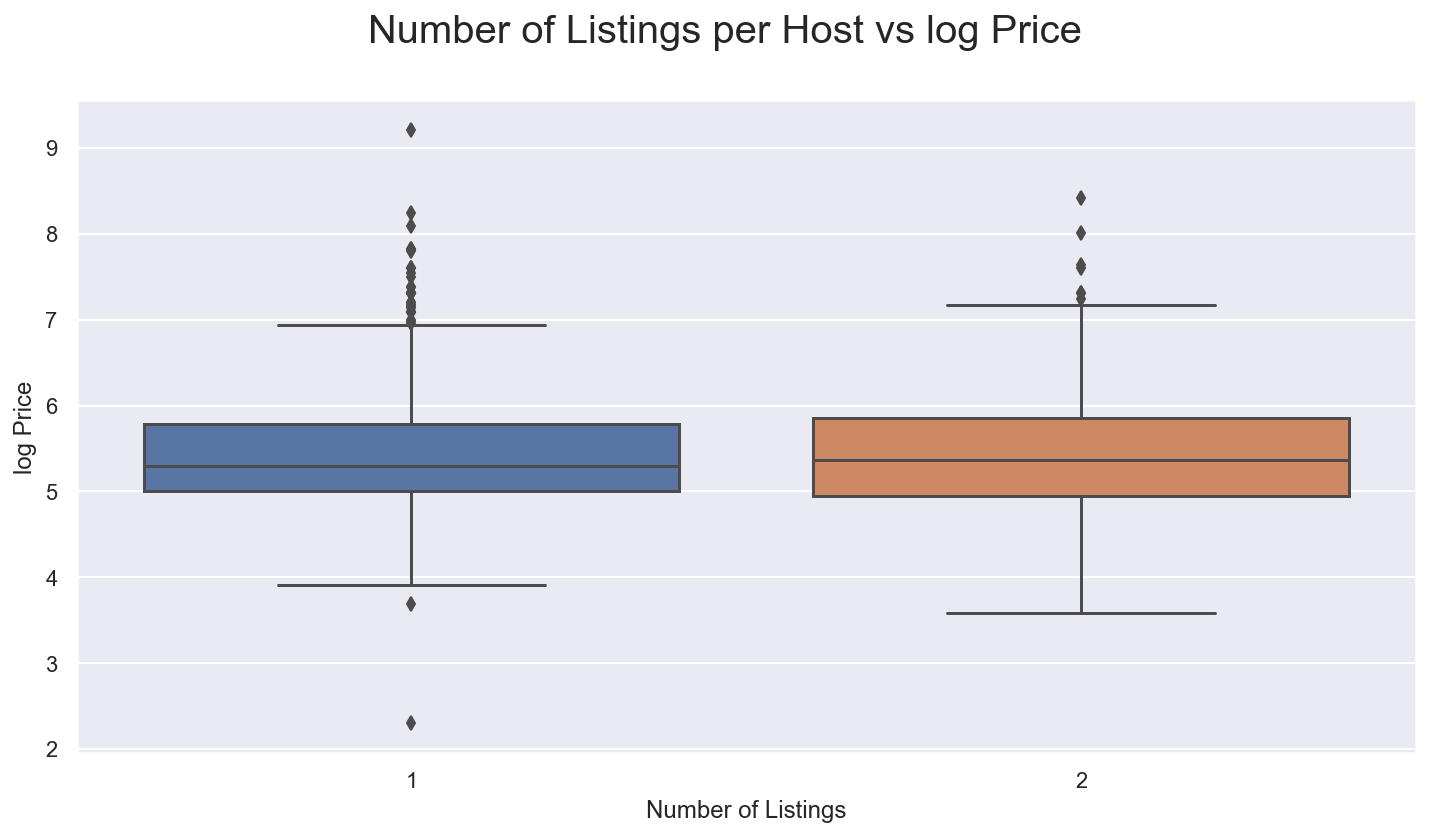

In [35]:
fig, ax = plt.subplots(1, figsize=(12, 6))
fig.suptitle('Number of Listings per Host vs log Price', fontsize=20)
sns.boxplot(x['count_group'], x['price_log'])
ax.set(xlabel='Number of Listings', ylabel='log Price')
plt.show()

- From the table(DataFrame) we generate above, we notice that over 80% hosts own one or two listings per person, and very few own listings more than 2. Therefore, we focus on analyzing the listings whose hosts own one or two listings. It turns out that there is not much difference in distributions. Therefore, how many listings the owners have does not correlate with price.

### 2.8 Airbnb Listings: Transit Scores

For better visualization, we are going to group the transit scores evenlly to 5 different categories based on the scores in ascending order. A score between 16 and 56 means the listing does not have good accessibility of public transportation;...; a score between 82 and 100 represents that the public transportation is of great accessibility. For each category, we are going to plot a boxplot so that we are able to see how the distributions of log price look like and whether higher transit scores are related to higher log price.

In [36]:
listings_score = listing_gpd[['transit_score','price_log']]
cut_off = pd.qcut(listings_score['transit_score'],5)
cut_off

0         (63.0, 69.0]
1         (63.0, 69.0]
2         (56.0, 63.0]
3         (63.0, 69.0]
4         (69.0, 82.0]
             ...      
4872     (82.0, 100.0]
4873      (69.0, 82.0]
4874    (15.999, 56.0]
4875      (69.0, 82.0]
4876    (15.999, 56.0]
Name: transit_score, Length: 4877, dtype: category
Categories (5, interval[float64]): [(15.999, 56.0] < (56.0, 63.0] < (63.0, 69.0] < (69.0, 82.0] < (82.0, 100.0]]

In [37]:
# a helper function to group transit scores based on cut_off
def group_score(x):
    if (x <= 56):
        return '(16,56]'
    elif (x<= 63):
        return '(56, 63]'
    elif (x<=69):
        return '(63, 69]'
    elif (x<=82):
        return '(69, 82]'
    elif (x<=100):
        return '(82, 100]'

In [38]:
listings_score = listings_score.assign(group = listings_score['transit_score'].apply(group_score))

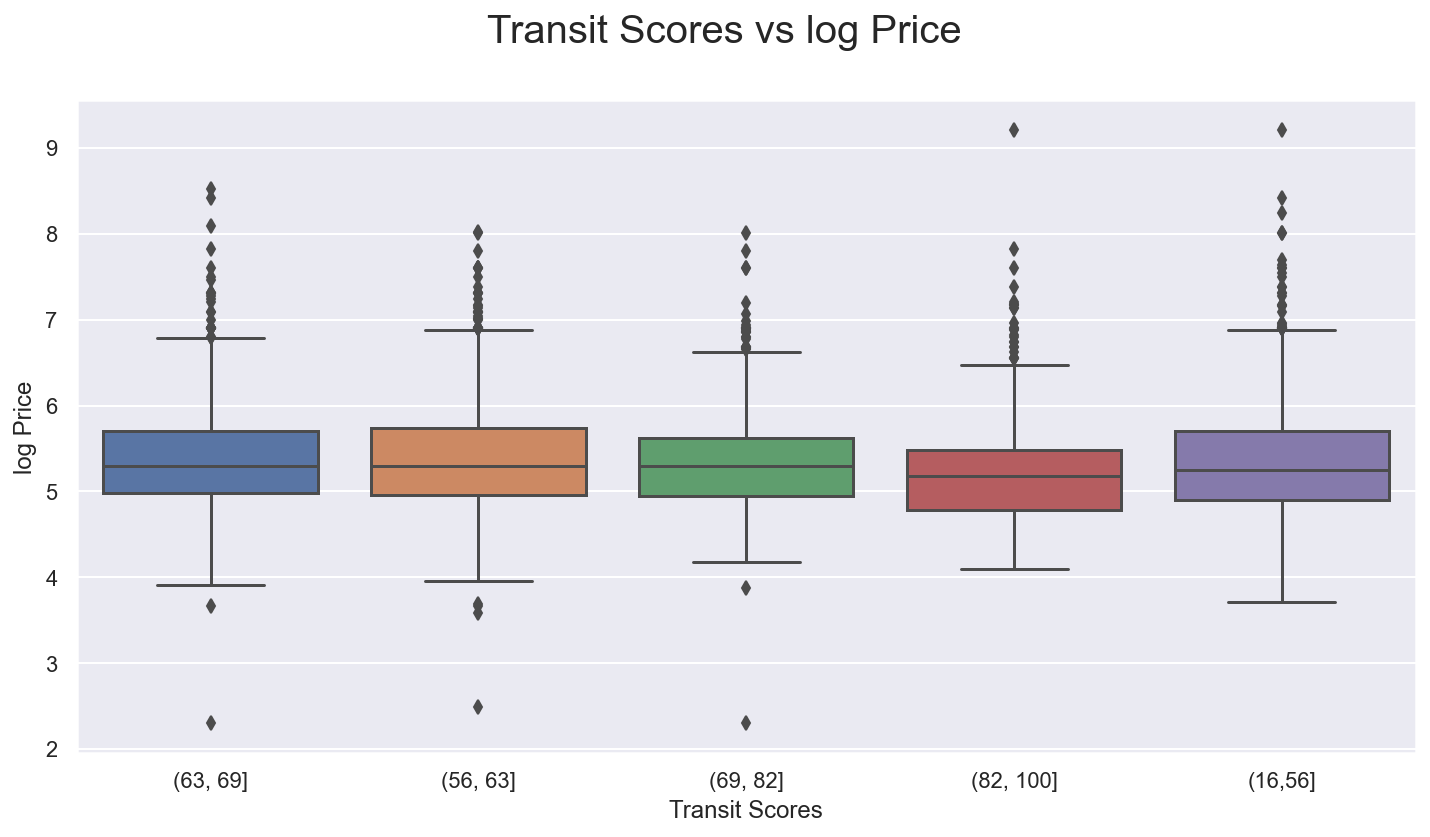

In [39]:
# plot several boxplots to visualize the disribution of log price in terms of transit scores.
fig, ax = plt.subplots(1, figsize=(12, 6))
fig.suptitle('Transit Scores vs log Price', fontsize=20)
sns.boxplot(listings_score['group'], listings_score['price_log'])
ax.set(xlabel='Transit Scores', ylabel='log Price')
plt.show()

- We find out that for each range of transit scores, the distributions of log price looks similar. The median is about 5.2 and interquartile ranges of the distributions are also similar. 
- It seems that there is no relationship between transit scores and log price. It is reasonable, because not all of the people care about the accessibility of public transportations: comparing to the inner features of Airbnb itself, the accessibility of public transportations might be a less important feature.

### 2.9 Airbnb Listings: Neighbourhood

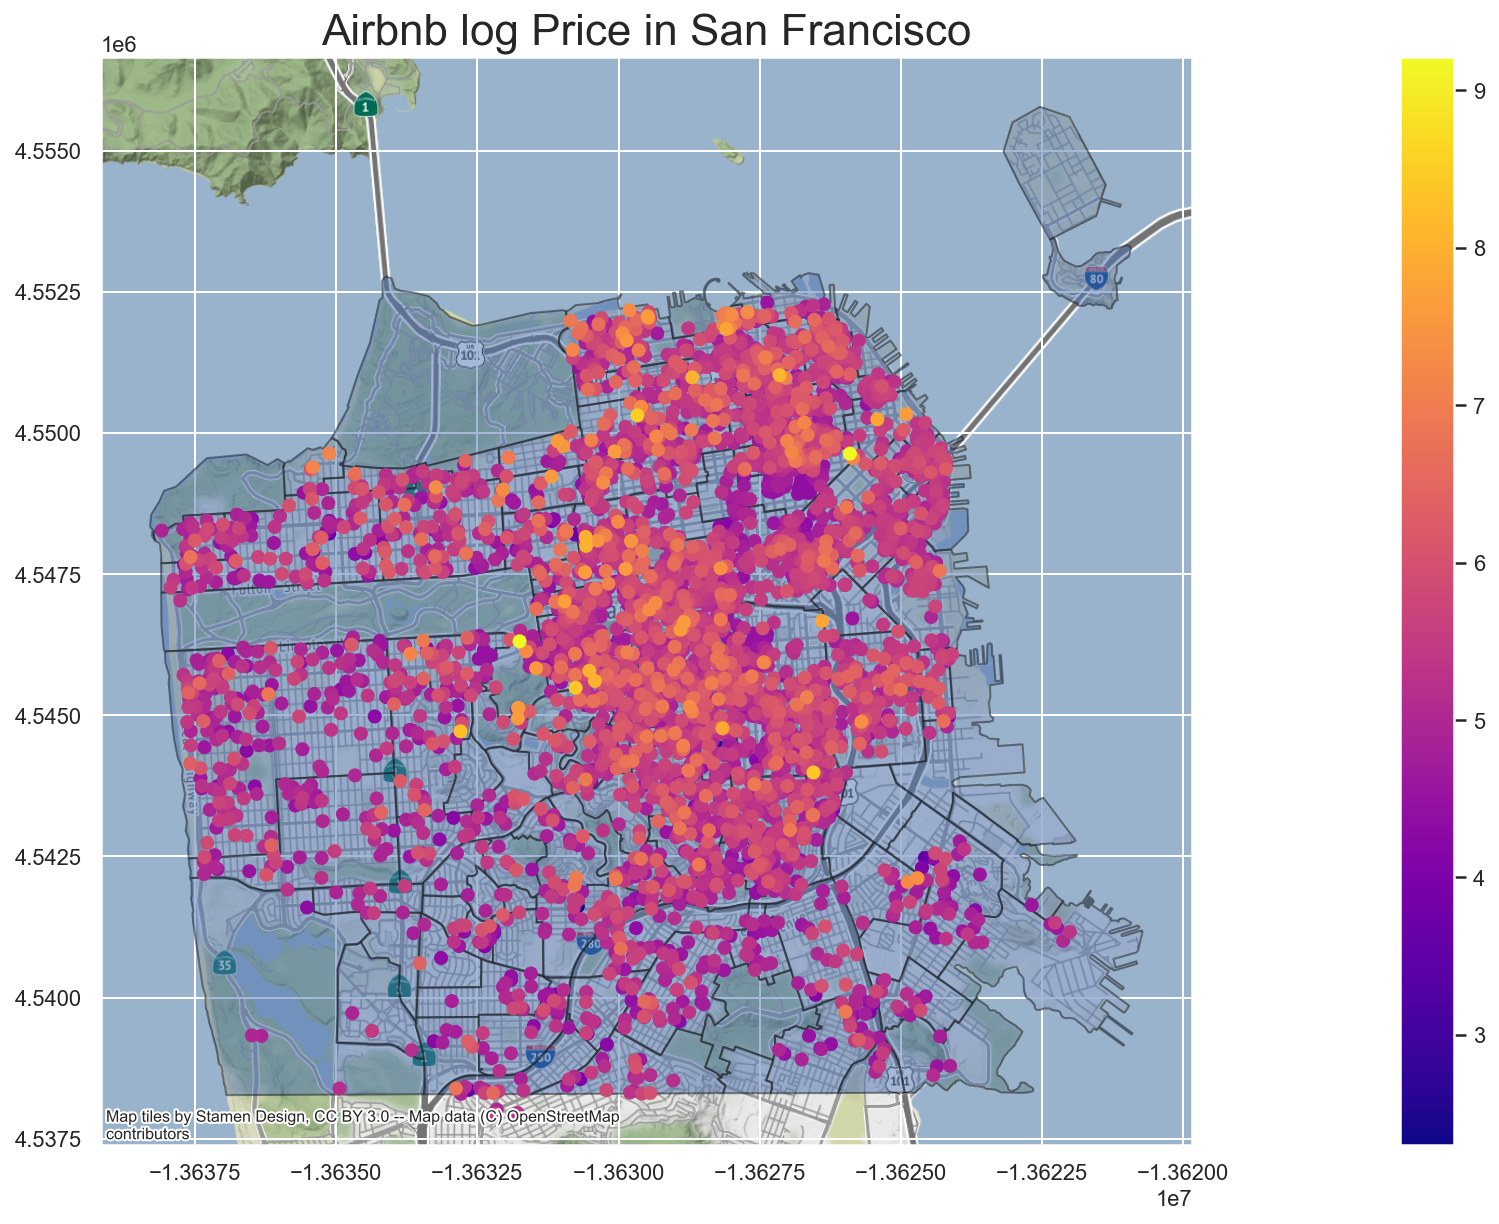

In [40]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
divider = make_axes_locatable(ax)
sf_map = sf.plot(ax=ax, alpha=0.5, edgecolor='k')
ctx.add_basemap(sf_map)
listing_gpd.sort_values('price_log').plot('price_log', cmap='plasma',ax=sf_map, legend=True);
ax.set_title("Airbnb log Price in San Francisco", fontsize=22)
plt.show()

- To gain sense about the geographical distribution of Airbnb’s log price with respect to the neighborhood information, we locate the log price of houses on the map.  
- As can be seen from the map, the middle right and upper right areas tend to have airbnbs that are more expensive (dots are brighter) while areas situated at the corner of the map have cheaper airbnbs (dots are dimmer). 
Based on this observation, we decided to look more closely at the average log price of each neighbourhood by drawing a horizontal bar plot. 


In [41]:
neig_price = listing_gpd[['price_log','neighbourhood']]
neig_price = neig_price.groupby(['neighbourhood']).mean()
neig_price['neighbourhood'] = neig_price.index
neig_price = neig_price.sort_values('price_log', ascending=False)

Text(0.5, 1.0, 'log Price vs Neighbourhood')

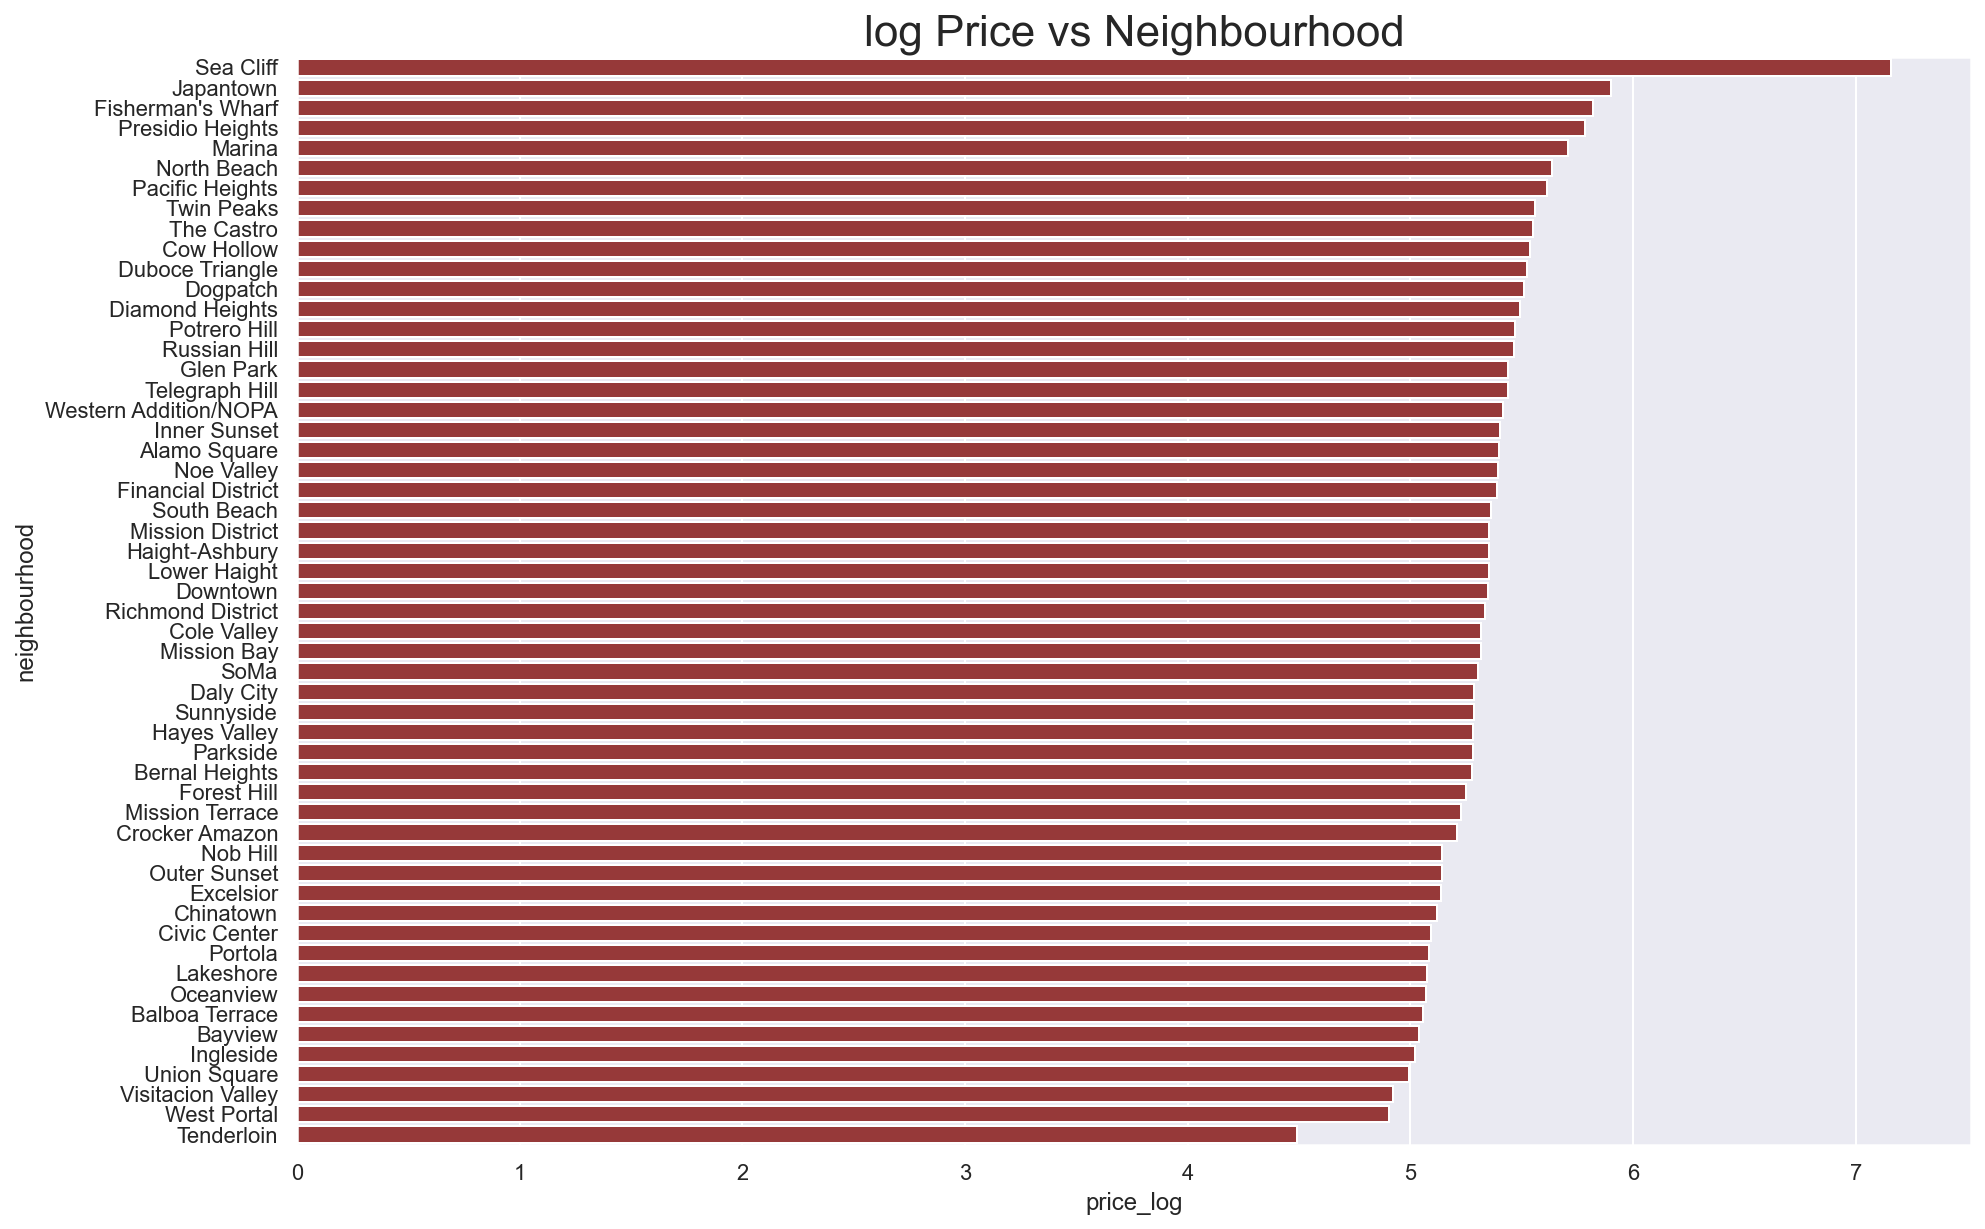

In [42]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
sns.barplot(x="price_log", y="neighbourhood", data=neig_price, color='brown')
ax.set_title("log Price vs Neighbourhood", fontsize=22)

In [43]:
neig_price[neig_price['neighbourhood'] == 'Sea Cliff']

,price_log,neighbourhood
neighbourhood,,
Sea Cliff,7.160069,Sea Cliff


- Based on the bar plot, we can see that different neighborhoods tend to have different average log prices, with Sea Cliff and Japantown as the areas with the highest average prices and Tenderloin with the lowest average price. Although Sea Cliff is situated at the upper left corner, there is only one airbnb present, leading to the exceptionally high price. Japantown is situated at the upper right region (consistent with our observations in the geospatial map above), Tenderloin is the area in the upper right that has a significantly dimmer color compared to its neighbor region as can be seen from the geospatial map.

### 2.10 Building a Classifier

#### 2.10.0 Set a threshold for the classifier
We use average log price as a threshold for the classifier (log scale of the price and round to 2 decimal). <BR>
We apply log transformation to price because the distribution of price is highly skewed to right; the distribution of log price is more normally distributed. Moreover, We choose average log price as a threshold, because we want to explore what kind of listings have relatively high/low prices when comparing to the average.

In [45]:
# set threshold
thresh = round(listing_gpd['price_log'].mean(), 2)
thresh

5.33

#### 2.10.1 Evaluation Metric

We decide to use F1 score as our evaluation metric. First, using accuracy as the evaluation metrics might not work very well, and there might be little differences between baseline and our final advanced model, because it treats TP as same as TN. In addition, accuracy in Machine Learning cannot tell a lot since if we have an unbalanced dataset, we could have a really high accuracy even though the model performs really bad or a really low accuracy even though the model performs really good. [See the Example of Recurrence of Breast Cancer for More Explanation](https://machinelearningmastery.com/classification-accuracy-is-not-enough-more-performance-measures-you-can-use/). However, the False Negatives and False Positives are crucial in this case, because a cheap listing being predicted as an expensive one or an expensive one being predicted as a cheaper one will affect decisions of owners and customers. F1 Score is the weighted average of Precision and Recall. Therefore, we choose F1 score to measure model performance.


In [46]:
# This is a helper function that summarize all scores that are used to evaluate the model performance
def stats(pred,truth):
    TP_ = np.logical_and(pred, truth)
    FP_ = np.logical_and(pred, np.logical_not(truth))
    TN_ = np.logical_and(np.logical_not(pred), np.logical_not(truth))
    FN_ = np.logical_and(np.logical_not(pred), truth)

    TP = sum(TP_)
    FP = sum(FP_)
    TN = sum(TN_)
    FN = sum(FN_)

    Precision = TP/(TP+FP)
    Recall = TP/(TP+FN)
    print('TP: ', TP,'FP: ', FP, 'TN: ',TN,'FN: ',FN)
    print('Precision: ', Precision)
    print('Recall: ', Recall)
    print('pos:',TP+FP)
    print('neg:',TN+FN)
    print('F1:', metrics.f1_score(truth, pred))

#### 2.10.2 Baseline model: 
We are going to construct a very basic model using neighbourhood to predict whether the log price of listing will be above or below average. Later on, we will add more features that we think is related to log price based on the EDA results.
#### 2.10.2.1 Onehot Encoding

We will perform One-hot Encoding for neighbourhood. Since the model cannot operate on nominal data directly, so, we need to convert this variable to a numerical form by adding new binary variables (One-hot Encoding).

In [47]:
# One-hot Encoding on neighbourhood
neig = listing_gpd[['price_log']]
for c in ['neighbourhood']:
    for val in listing_gpd[c].unique():
        neig['%s=%s' %(c, val)] = (listing_gpd[c] == val).astype(int)
# assign 0 or 1 to log price, indicating whether the listing is above or below the threshold
neig = neig.assign(price_high =neig['price_log'].apply(lambda x: 0 if x<thresh else 1)).drop(['price_log'],axis = 1)
neig.head()

,neighbourhood=Lower Haight,neighbourhood=Bernal Heights,neighbourhood=Western Addition/NOPA,neighbourhood=Mission District,neighbourhood=Nob Hill,neighbourhood=Hayes Valley,neighbourhood=Union Square,neighbourhood=Cole Valley,neighbourhood=South Beach,neighbourhood=Noe Valley,...,neighbourhood=Visitacion Valley,neighbourhood=Forest Hill,neighbourhood=Portola,neighbourhood=Crocker Amazon,neighbourhood=Mission Bay,neighbourhood=Oceanview,neighbourhood=Japantown,neighbourhood=Daly City,neighbourhood=Sea Cliff,price_high
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### 2.10.2.2 Generating train/test set

We split our dataset into training and testinig set. Of all data, 80% are training set and 20% are testing set. We are going to train our model using the training set and make predictions using the testing set.

In [48]:
#  select x and y vairables for prediction
X = neig.drop(['price_high'],axis = 1)
y = neig['price_high']
#  train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
prop_train = round(X_train.shape[0]/X.shape[0],1)
prop_test = round(X_test.shape[0]/X.shape[0],1)
print('Proportion of training, testing, and validation set:', prop_train,', ',prop_test)

Proportion of training, testing, and validation set: 0.8 ,  0.2


#### 2.10.2.3 Fitting the baseline model using Logistic Regression

In [49]:
# fit the model and evaluate the model performance
logistic = LogisticRegression(C=1,max_iter=500,solver='lbfgs')
logistic.fit(X_train,y_train)
print('Result on Test set')
pred = logistic.predict(X_test)
stats(pred,y_test)

Result on Test set
TP:  119 FP:  99 TN:  457 FN:  301
Precision:  0.5458715596330275
Recall:  0.2833333333333333
pos: 218
neg: 758
F1: 0.3730407523510972


Model Performance: the F1 score of our baseline model is approximately 0.4. The model does not perform very well. It is expected, because in our baseline model, we only use neighbourhood as predictor, but we do not consider what is the relation between the features and the predicted value. Moreover, in model selection, we have not compared different models but only randomly choose one, which may not reach the best prediction results.

#### 2.10.3 Advance model
We select neighbourhood, # bathrooms, # bedrooms, # accommodates, and rating as predictors
#### 2.10.3.1 Logistic Regression 

In [50]:
# Selecting features for prediction
features = listing_gpd[['accommodates', 'bathrooms','bedrooms','review_scores_rating','price_log']]
# One-hot Encoding
for c in ['neighbourhood']:
    for val in listing_gpd[c].unique():
        features['%s=%s' %(c, val)] = (listing_gpd[c] == val).astype(int)
# assign 0 or 1 to log price, indicating whether the listing is above or below the threshold
features = features.assign(price_high =features['price_log'].apply(lambda x: 0 if x<thresh else 1)).drop(['price_log'],axis = 1)
features.head()

,accommodates,bathrooms,bedrooms,review_scores_rating,neighbourhood=Lower Haight,neighbourhood=Bernal Heights,neighbourhood=Western Addition/NOPA,neighbourhood=Mission District,neighbourhood=Nob Hill,neighbourhood=Hayes Valley,...,neighbourhood=Visitacion Valley,neighbourhood=Forest Hill,neighbourhood=Portola,neighbourhood=Crocker Amazon,neighbourhood=Mission Bay,neighbourhood=Oceanview,neighbourhood=Japantown,neighbourhood=Daly City,neighbourhood=Sea Cliff,price_high
0,3,1.0,1.0,97.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5,1.0,2.0,98.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,4,1.5,2.0,97.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,4,1.0,2.0,96.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,1.0,0.0,99.0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
# Generating train/test set
X = features.drop(['price_high'],axis = 1)
y = features['price_high']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
prop_train = round(X_train.shape[0]/X.shape[0],1)
prop_test = round(X_test.shape[0]/X.shape[0],1)
print('Proportion of training, testing, and validation set:', prop_train,', ',prop_test)

Proportion of training, testing, and validation set: 0.8 ,  0.2


In [52]:
# fit the model and evaluate the model performance
logistic = LogisticRegression(C=1,max_iter=500,solver='lbfgs')
logistic.fit(X_train,y_train)
print('Result on Test set')
pred = logistic.predict(X_test)
stats(pred,y_test)

Result on Test set
TP:  296 FP:  68 TN:  474 FN:  138
Precision:  0.8131868131868132
Recall:  0.6820276497695853
pos: 364
neg: 612
F1: 0.7418546365914789


- After adding some features that we think is most relavant to log price, the F1 score of our improved model is about 0.74. Compared to the baseline model, we have made over 30% increase in F1 score.
- Then we are going to investigate whether the scores could be improved by Decision Tree Classifier and Random Forest Classifier.

#### 2.10.3.2 Decision Tree Classifier

In [53]:
# fit the model and evaluate the model performance
tree = DecisionTreeClassifier().fit(X_train, y_train)
print('Result on Test set')
pred_tree = tree.predict(X_test)
stats(pred_tree,y_test)

Result on Test set
TP:  281 FP:  99 TN:  443 FN:  153
Precision:  0.7394736842105263
Recall:  0.6474654377880185
pos: 380
neg: 596
F1: 0.6904176904176904


- The F1 score based on Decision Tree Classifier is around 0.69, which is less than the F1 score obtained from Logistic Regression.

#### 2.10.3.3 Random Forest Classifier

In [54]:
# fit the model and evaluate the model performance
forest = RandomForestClassifier(n_estimators=100).fit(X_train,y_train)
pred_forest = forest.predict(X_test)
print('Result on Test set')
stats(pred_forest,y_test)

Result on Test set
TP:  305 FP:  97 TN:  445 FN:  129
Precision:  0.7587064676616916
Recall:  0.7027649769585254
pos: 402
neg: 574
F1: 0.7296650717703349


- The F1 score based on Random Forest Classifier is around 0.72, which is also less than the F1 score obtained from Lotistic Regression.

- Overall, after evaluating the F1 scores obtained from the baseline model and improved model based on three different classifiers, we conclude that we can use neighbourhood, number of bathrooms, number of bedrooms, number of accommodates, and rating scores to predict whether the listing price of an Airbnb is higher or lower than the average listing price (in log scale) with 0.74 F1 score.

# Ethics & Privacy

We would like to ensure our project sticks to ethics and privacy norms, considering possible ethics and privacy issues that might arise.
- Data collection and potential bias in data:<BR>
The greatest majority of our data are collected from Inside Airbnb, which provide datasets that contain comprehensive Airbnb information based on cities. On the website, it clearly states that all these data displayed are sourced from the Airbnb site which is available to the public. Therefore, there will be no privacy concern for analyzing these open data. To prevent violation of data privacy, we also check on the terms of use of other two data sites and ensure we have the permission to utilize them for further analysis purposes. One problem is that our data is limited to a certain time period in the city San Francisco. In other words, we only used data that are available at a given time (2020). We cannot assume any of the statistics was the same in the past, or would stay the same in the future. Also, we only looked at observations that are Entire home/apartment. As a result, our prediction model would not be applicable for other room types, other cities, or other time period. 
- Data analysis: <BR>
In addition, we managed to limit personally identifiable information exposure. We noticed that data such as: host name and location, in our dataset reveals a great deal of Airbnb host’s personal information. This could cause privacy issues if being misused to track on the host. Moreover, there is a possibility that these data are inaccurate due to misspelling or lack of updating. Since our objectives have nothing to deal with the location and name of the host, therefore we would like to drop “host_url”, “host_name” “host_location” columns from our datasets.
- Potential use of our analysis: <BR>
There are some parties that might be interested in our analysis. It could be potential customers who intend to book an Airbnb in San Francisco or new hosts who are planning to start running his or her own Airbnb. Our concern is that our analysis conclusion may negatively affect hosts’ business survival or customers’ benefits. For instance, after using our model for prediction, some hosts who set relatively high prices may have to lower their price in order to remain competitive, even though their houses have above-average cost of maintenance. This could put threats on their business survival. Therefore, since we only investigate several factors of our interests and make models based on those features, to minimize the possible negative consequence, we will make it clear that there are still other significant factors that would affect the listing price.

    


# Conclusion & Discussion

- In this project, we invetigate whether we can use characteristics of the Airbnb’s listing and neighborhood to predict if an Airbnb in San Francisco’s listing price is below or above market average price level. We have performed EDA and built a classifier to answer our research question. From our EDA process, we find that there is a positive relationship between listing price and accommodates, number of bathrooms, number of bedrooms, rating scores. Moreover, the listing price varies between different neighborhoods. Therefore, we perform classification using the above 5 features as predictors. The F1 score of our final model is 0.74 based on Logistic regression, with an improvement of about 30% comparing to baseline model.
- Limitation and Potential Improvement: Our analysis has some limitations. First of all, we only take out 16 variables (columns) out of 106 columns on the dataset, so there are many columns we did not take into consideration and do analysis. Secondly, we only consider listings that are an entire apartment or house, that is, nearly half of the observations are dropped. Adding various room types might improve our classifier or result in more interesting analysis. Moreover, there are over 1000 missing values in number of reviews per month and rating, which is replaced by 0's. This might mask the underlining relationship between price and those two variables. There is much space for improving our model. One possible implementation is using another dataset which contains review texts on each Airbnb Listing. If we would like to improve our classifier, we may take the review texts into account by applying TD-IDF or Bag of Words. 

- Social impact: The classification we build could help people better understand how the facilities and market competition of the neighborhoods affect the listing price of Airbnb. For example, house owners could use the model to evaluate the price they charge in comparison to the market price level. For visitors who have demand on Airbnbs, this project helps to make better decision on where they should stay depending on the internal and external features of Airbnb listings.



# Team Contributions

* Chang Gao:
    * Search for the dataset online
    * Data Visualization
    * Write the report
    * Proofreading
* Zerong Li:
    * Search for the dataset online
    * Data Cleaning
    * Data Visualization
    * Data Analysis
* Qing Liu:
    * Search for the dataset online
    * Collect reference
    * Data Visualization
    * Write the report
* Shuli Zhu:
    * Search for the dataset online
    * Data Visualization
    * Data Analysis
    * Proofreading
